In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
# make synthetic data nw
X1, y1 = make_blobs(n_samples=500, centers=4, n_features=2, random_state=42)
X2, y2 = make_moons(n_samples=500, noise=0.3, random_state=42)
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2 + 4), axis=0)

In [20]:
# split the synthetic data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# we'll be using euclidean distance here, we can try more later
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [22]:
# KNN timeeee
def knn(X_train, y_train, query, k):
    distances = []

    for i in range(len(X_train)):
        distance = euclidean_distance(X_train[i], query)
        distances.append((distance, y_train[i]))

    distances.sort(key=lambda x: x[0])

    neighbors = [distance[1] for distance in distances[:k]]

    return max(set(neighbors), key=neighbors.count)

In [23]:
k_values = range(1, 21)
accuracies = []

In [24]:
# test knn now
for k in k_values:
    predictions = []
    for i in range(len(X_test)):
        prediction = knn(X_train, y_train, X_test[i], k)
        predictions.append(prediction)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

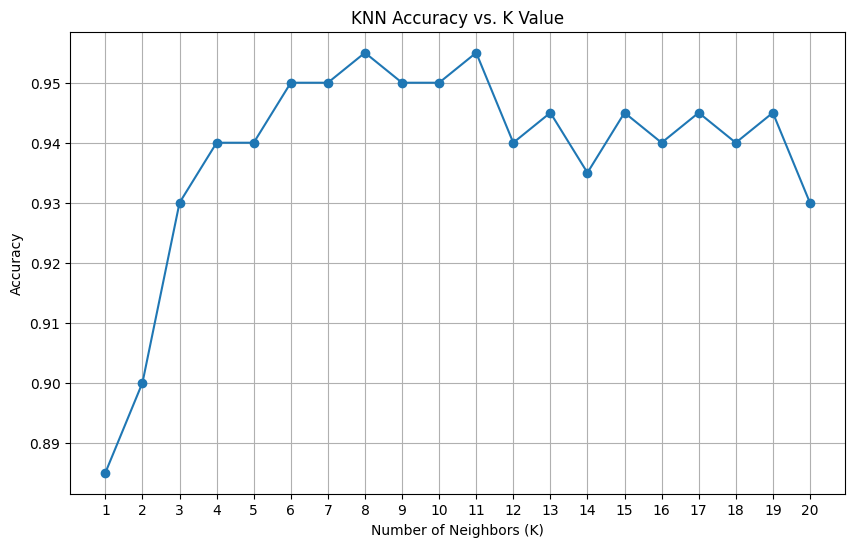

In [25]:
# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

In [26]:
best_k = k_values[np.argmax(accuracies)]
print(f"Best K: {best_k} with accuracy: {max(accuracies):.2f}")

Best K: 8 with accuracy: 0.95


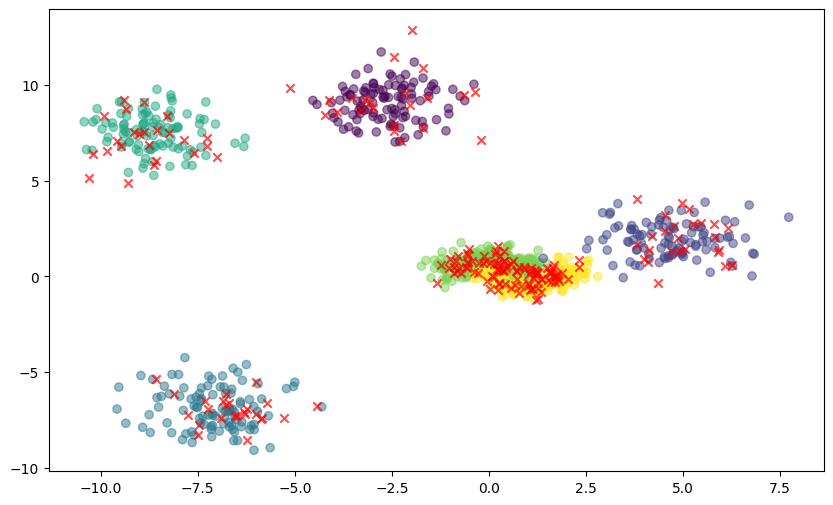

In [27]:
# Plotting the training and test data with decision boundaries
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Training Data', alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', marker='x', label='Test Data', alpha=0.7)

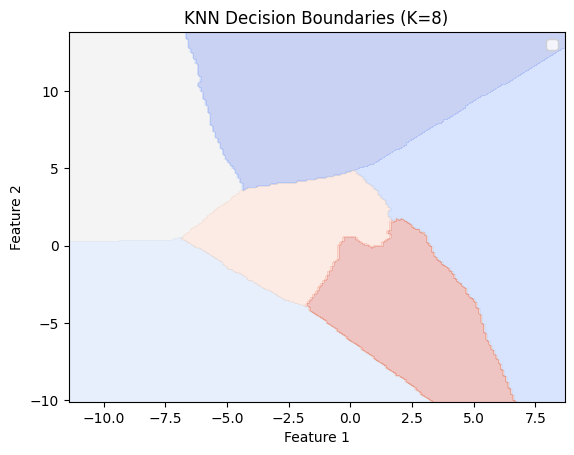

In [28]:
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on the mesh grid
Z = np.zeros(xx.shape, dtype=int)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        Z[i, j] = knn(X_train, y_train, np.array([xx[i, j], yy[i, j]]), best_k)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.title(f'KNN Decision Boundaries (K={best_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()